# Introduction to sounds with Python

In this lesson we'll be discussing how to use python to process sounds. We will use python to read in sound files, generate sound files, manipulate sound files, and even play sound files. 

## Read in file as numpy array
First, we'll try reading in a sound file. To do this we'll use the scipy package, and within scipy we'll be using a module called "io" (which stands for input/output). From this module, we are going to call a function that will read in a .wav file:

In [1]:
from scipy.io.wavfile import read

Now we have access to the read function. For example, if we call the help function, it will give us some information about what "read" can do:

In [2]:
help(read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file.
    
    Return the sample rate (in samples/sec) and data from an LPCM WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Input WAV file.
    mmap : bool, optional
        Whether to read data as memory-mapped (default: False).  Not compatible
        with some bit depths; see Notes.  Only to be used on real files.
    
        .. versionadded:: 0.12.0
    
    Returns
    -------
    rate : int
        Sample rate of WAV file.
    data : numpy array
        Data read from WAV file. Data-type is determined from the file;
        see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
        (Nsamples, Nchannels) otherwise. If a file-like input without a
        C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
        passed, this will not be writeable.
    
    Notes
    -----
    Common data types: [1]_
    
    ================

In [3]:
#or, better, because it will open a pop-up dialog and not clog your code:
?read

Signature: read(filename, mmap=False)
Docstring:
Open a WAV file.

Return the sample rate (in samples/sec) and data from an LPCM WAV file.

Parameters
----------
filename : string or open file handle
    Input WAV file.
mmap : bool, optional
    Whether to read data as memory-mapped (default: False).  Not compatible
    with some bit depths; see Notes.  Only to be used on real files.

    .. versionadded:: 0.12.0

Returns
-------
rate : int
    Sample rate of WAV file.
data : numpy array
    Data read from WAV file. Data-type is determined from the file;
    see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
    (Nsamples, Nchannels) otherwise. If a file-like input without a
    C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
    passed, this will not be writeable.

Notes
-----
Common data types: [1]_

=====================  ===========  ===========  =============
     WAV format            Min          Max       NumPy dtype
=====================  ===========  ====

Here we can see from the parameters that we need to pass to the `read` function (as a minimum): a string that represents the filename. Notice that it outputs two things: a sample rate, and a numpy array representing the samples of the sounds.

Note that the function will look in the same directory where your current notebook is stored for the file. If it isn't there, it will throw an error. Use the `..` notation to tell Jupyter to look upwards in the directory tree for the file or `../NameOfFolder` if the file is in a parallel folder. 

We will call the read function on a file uploaded to the "uploaded_audio" directory (copy over from Canvas) called "Flute-A4.wav"

In [4]:
(fs, x) = read("../audio/80spopDrums.wav")

In [5]:
x

array([  0, -29, -29, ...,   0,   0,   0], dtype=int16)

## A few basics
Now we can ask some things about this file, for example, how long is the array? We do this by calling the "size" attribute:

In [6]:
x.size
len(x) #only works for 1 dimension

384993

So there are 384,993 samples in the file. If we want to know how many seconds that is, we can divide by the sampling rate (44,100 samples per second):

In [7]:
x.size/fs

8.73

We will do more in a bit with numpy and indexing, but for now:

You can index a range of values with square brackets, like this:

In [8]:
x[0:100]

array([    0,   -29,   -29,    -7,   247,   152,  -152,  -219,   162,
         571,  -348,  -869,  -783,  -617, -1555,  -191,   507,  -838,
        1483,  -963,  2944,  4613,  4053,  6575,  4655,  5668,  4796,
        7026,  6397,  5919,  8409,  6974,  7770,  7025,  7288,  5811,
        7673,  7522,  5940,  7839,  5728,  3530,  7181,  5338,  5429,
        4969,  3951,  3873,  3356,  5919,  4261,  4666,  2435,  5570,
        3476,  3684,  6881, -1829,  9379,  5867,  2735,  8931,  3598,
        4905,  4932, -2888,  4260,  6403,  4886,  2835,  4373,  1260,
        1628,  6695,  1226,  4987,   336,    96,  6361,   294,  4805,
        3724,  -961,  5478,  -177,  4281,  2247,  4163,  2539,  1410,
       -3256,   138,  3333,  6424,  1846, -1683,  1743, -5045,  -273,
        1924], dtype=int16)

## Basic plotting
We can also plot the sound wave to see what it looks like. We'll do that using a popular python plotting library called matplotlib, and we'll mostly be using the pyplot module. So next, we'll import the pyplot module from the library, and give it a shortcut (or alias). Then we'll call the plot function and ask it to plot our array:

In [9]:
from matplotlib import pyplot as plt

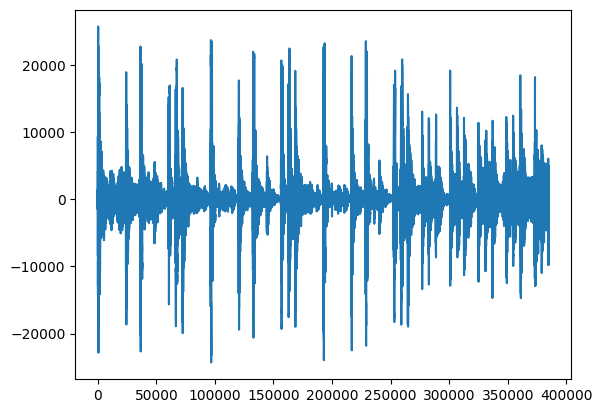

In [10]:
plt.plot(x)

However, currently coordinates in this plot have default x-values according to their order (or "index" value; i.e., 1st, 2nd, 3rd, etc.). What would make more sense is to plot the x-axis according to time. How could we do that?

We will need to explicitly pass an array of time values to the x-axis. 
We can use the `numpy` library, which is designed for working with arrays. 
Specifically, we will need to convert sample positions to positions in time.

In [11]:

import numpy as np

We're going to use the "arange" function. Let's see what it does:

In [12]:
?np.arange

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

This is a really useful function and we'll likely be using it a lot. It creates a numpy array that begins with the "start" value, ends (before) the "stop" value, and increments by the "step" value. Notice that the "start" and "step" arguments are optional and have default values of 0 and 1, respectively. 

Notice also the line about incrementing by non-integer values; in this case it's better to use the function linspace instead of arange. You can play around with them and test it out.

(You will also want to read about `np.linspace`, which is similar and we will also use a lot)

What will be the result of this function?:

In [15]:
sampArr = np.arange(x.size)

In [17]:
sampArr

array([     0,      1,      2, ..., 384990, 384991, 384992])

Our variable "x" is an array containing the amplitude values for every sample. Here we use `np.arange` to convert the array to essentially its index value (or position)--so far doing exactly what `pyplot` was doing by default. 
However, if we then divide each value by the sample rate, we will have an array representing each sample's position on a time axis beginning from zero.

In [18]:
t = np.arange(x.size)/fs
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       8.72993197e+00, 8.72995465e+00, 8.72997732e+00])

Notice that this is a vector operation (it automatically applied the division to every item in the array). Now we have a series of time values that "line up with" our sample values. 

We can now redo our plot but this time plot *t* with respect to *x*:

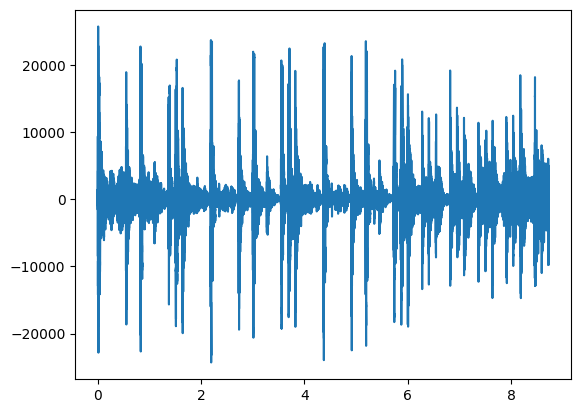

In [19]:
plt.plot(t, x)

We should really always add titles and label our axes, so let's do that:

Text(0, 0.5, 'Amplitude')

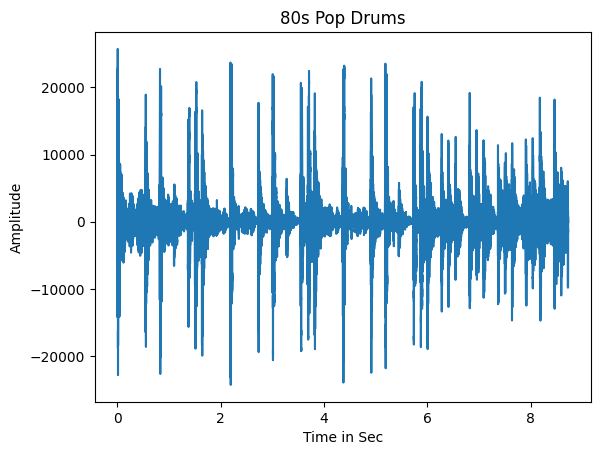

In [20]:
plt.plot(t, x)
plt.title('80s Pop Drums')
plt.xlabel('Time in Sec')
plt.ylabel('Amplitude')

We can also play our sound back and hear what it sounds like. We'll do this by using the `Audio` function from IPython. 

In [21]:
from IPython.display import Audio

Audio will accept many files types including mp3, but we'll only be working with wav files for now. Note that audio also accepts a numpy array. However, you should be *extremely* cautious before playing back any numpy arrays you have created. **Always play back at very low volume first!!!**

In [ ]:
Audio(x, rate=fs)
# If don't give rate, will automatically choose whatever sample is attached to

You can also pass `Audio()` a numpy array. However, you'll need to provide a sample rate as one of the arguments (or else the function doesn't know what to do)! It needs the sample rate to be able to interpret the array. Like so:

In [23]:
Audio(x, rate=fs*2)